## **Shreya Akurathi** 
## **200968188**
## **Lab 1 - Ex2**
## **30/01/23**

# 2.Train an autoencoder to detect anomalies usingthe ECG5000 dataset.

Plot and observe a normal ECG vs an anomalous ECG.

Design and Train  an  autoencoder  on  the  normal  rhythms  only,  then  use  it  to reconstruct all the data.
The autoencoder is trained using only the normal ECGs, but is evaluated using the full test set.

Classify an ECG as anomalous if the reconstruction error is greater than one standard deviation from the normal training examples. 

***Import required libraries***

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

***import files***

In [ ]:

df = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
#mupy array of pixel valuea to traverse easier
raw_data = df.values


In [ ]:
print(df.shape)


(4998, 141)


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [ ]:
raw_data

array([[-0.11252183, -2.8272038 , -3.7738969 , ...,  0.92528624,
         0.19313742,  1.        ],
       [-1.1008778 , -3.9968398 , -4.2858426 , ...,  1.1196209 ,
        -1.4362499 ,  1.        ],
       [-0.56708802, -2.5934502 , -3.8742297 , ...,  0.90422673,
        -0.42179659,  1.        ],
       ...,
       [-1.1229693 , -2.2529248 , -2.8676281 , ..., -2.0083694 ,
        -1.8083338 ,  0.        ],
       [-0.54770461, -1.8895451 , -2.8397786 , ...,  1.1504486 ,
         0.80493225,  0.        ],
       [-1.3517791 , -2.2090058 , -2.5202247 , ..., -1.577823  ,
        -0.68453092,  0.        ]])

***Find labels: 0 - wrong , 1- normal , last element of array***

In [ ]:

labels = raw_data[:, -1]

data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

***Normalise b/w 0 and 1***

In [ ]:

min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [ ]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

train_data, normal_test_data, anomalous_train_data

(<tf.Tensor: shape=(3998, 140), dtype=float32, numpy=
 array([[0.57030463, 0.46561658, 0.29058117, ..., 0.48504233, 0.4233502 ,
         0.47598344],
        [0.48320588, 0.28246963, 0.16471253, ..., 0.567567  , 0.4677294 ,
         0.2692329 ],
        [0.48144642, 0.35151404, 0.25972766, ..., 0.5479421 , 0.5077544 ,
         0.54298663],
        ...,
        [0.41039047, 0.24164985, 0.13120876, ..., 0.5277313 , 0.5654091 ,
         0.5023885 ],
        [0.5397748 , 0.4140786 , 0.28101394, ..., 0.51266515, 0.43706053,
         0.4426865 ],
        [0.29639772, 0.15988176, 0.18883787, ..., 0.53766966, 0.545786  ,
         0.40826708]], dtype=float32)>,
 <tf.Tensor: shape=(560, 140), dtype=float32, numpy=
 array([[0.48035768, 0.28877792, 0.19828546, ..., 0.45463306, 0.5246125 ,
         0.3713729 ],
        [0.45354807, 0.2557325 , 0.15979648, ..., 0.4801337 , 0.5284734 ,
         0.49527124],
        [0.4521779 , 0.25685105, 0.12592098, ..., 0.55448556, 0.5861353 ,
         0.4754273 ]

# ***Plotting normal ECG***

In [ ]:
normal_train_data.shape

TensorShape([2359, 140])

2359 ecg entries

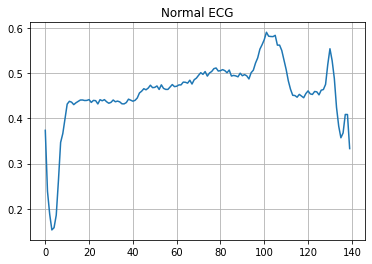

In [ ]:
plt.grid()

plt.plot(np.arange(140), normal_train_data[2000])
plt.title(f"Normal ECG")
plt.show()



# ***Plotting an anamolous ecg ***

In [ ]:
anomalous_train_data.shape

TensorShape([1639, 140])

1639 entries

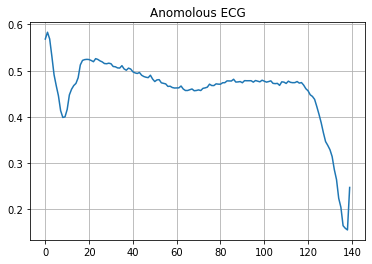

In [ ]:
plt.grid()

plt.plot(np.arange(140), anomalous_train_data[1600])
plt.title(f"Anomolous ECG")
plt.show()

# **AutoEncoder**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers,losses
from tensorflow.keras.layers import Flatten,Dense, Input, Conv2D,MaxPool2D, UpSampling2D
from tensorflow.keras.models import Model

from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from numpy import argmax, array_equal

In [ ]:
input = Input(shape = (140,))

In [ ]:
en= Dense(32, activation="relu")(input)
en= Dense(16, activation="relu")(en)
en= Dense(8, activation="relu")(en)

de = Dense(16, activation="relu")(en)
de = Dense(32, activation="relu")(de)
de = Dense(140, activation="sigmoid")(de)

In [ ]:
autoencoder = Model(input, de)

In [ ]:
autoencoder.compile(optimizer="adam", loss="mae")

In [ ]:
hist = autoencoder.fit(normal_train_data,
                          normal_train_data,
                          epochs=50,
                          batch_size=512,
                          validation_data=(test_data, test_data),
                          shuffle=True)

Epoch 1/50
5/5 [==============================] - 1s 49ms/step - loss: 0.0583 - val_loss: 0.0528
Epoch 2/50
5/5 [==============================] - 0s 12ms/step - loss: 0.0553 - val_loss: 0.0507
Epoch 3/50
5/5 [==============================] - 0s 10ms/step - loss: 0.0520 - val_loss: 0.0486
Epoch 4/50
5/5 [==============================] - 0s 10ms/step - loss: 0.0480 - val_loss: 0.0473
Epoch 5/50
5/5 [==============================] - 0s 10ms/step - loss: 0.0441 - val_loss: 0.0455
Epoch 6/50
5/5 [==============================] - 0s 10ms/step - loss: 0.0398 - val_loss: 0.0430
Epoch 7/50
5/5 [==============================] - 0s 10ms/step - loss: 0.0357 - val_loss: 0.0415
Epoch 8/50
5/5 [==============================] - 0s 10ms/step - loss: 0.0325 - val_loss: 0.0405
Epoch 9/50
5/5 [==============================] - 0s 12ms/step - loss: 0.0303 - val_loss: 0.0392
Epoch 10/50
5/5 [==============================] - 0s 14ms/step - loss: 0.0287 - val_loss: 0.0386
Epoch 11/50
5/5 [============

# Classify an ECG as anomalous if the reconstruction error is greater than one standard deviation from the normal training examples. 


loss of train set till now

In [ ]:
new = autoencoder.predict(normal_train_data)


74/74 [==============================] - 0s 2ms/step


In [ ]:

train_loss = tf.keras.losses.mae(new, normal_train_data)

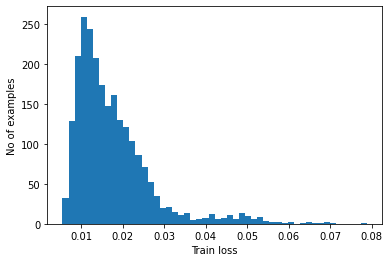

In [ ]:
plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

loss < 0.003

In [ ]:
classi = np.mean(train_loss) + np.std(train_loss)
print("Classification error rate: ", classi)

Classification error rate:  0.02696487


In [ ]:
new1 = autoencoder(test_data)

In [ ]:
loss = tf.keras.losses.mae(new1, test_data)

In [ ]:
preds= tf.math.less(loss, classi)

In [ ]:
    print("Accuracy = {}".format(accuracy_score(test_labels, preds)))
    print("Precision = {}".format(precision_score(test_labels, preds)))
    print("Recall = {}".format(recall_score(test_labels, preds)))

Accuracy = 0.94
Precision = 0.9940711462450593
Recall = 0.8982142857142857
